# Machine Learning Final Exam, Aug Semester, 2019

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Generate 200 2D points from each of 2 Guassians with distributions shaped roughly as shown in the diagram below, with class 1 as the 'X's and class 2 as the 'O's. Plot the resulting 400 points with different colors for each Gaussian.

![classes.png](attachment:classes.png)

In [24]:
np.ones((200,1)).shape
np.array([y_c1]).T.shape
X1.shape

(200, 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
mean1 = [2,3]; cov1 = [[0.5,0], [0,0.5]]
x_c1, y_c1 = np.random.multivariate_normal(mean1, cov1, 200).T
np.matrix([x_c1]).T.shape
X1 = np.c_[np.ones((200,1)), np.array([x_c1]).T, np.array([y_c1]).T ]

mean2 = [4,4]; cov2 = [[0.5,0], [0,0.5]]
x_c2, y_c2 = np.random.multivariate_normal(mean2, cov2, 200).T
X2 = np.c_[np.ones((200,1)), np.array([x_c2]).T, np.array([y_c2]).T ]

plt.plot(x_c1, y_c1, 'x')
plt.plot(x_c2,y_c2, 'o')
plt.axis('equal')
plt.show()

<Figure size 640x480 with 1 Axes>

## Question 2 (20 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [2]:
X1_train = X1[0:160,:]
X1_test = X1[160:,:]
X2_train = X2[0:160,:]
X2_test = X2[160:,:]



X_train = np.concatenate((X1_train, X2_train), 0)
y_train = np.concatenate((np.zeros((160,1)), np.ones((160,1))), 0)
X_test = np.concatenate((X1_test, X2_test), 0)
y_test = np.concatenate((np.zeros((40,1)), np.ones((40,1))), 0)

def predict(X, theta):
    return 1 / (1 + np.exp(- X @ theta))

def loglike(y, ypred):
    return sum(y * np.log(ypred) + (1-y) * np.log(1-ypred))[0]

def accuracy(y, ypred):
    return sum((ypred >= 0.5) == (y == 1)) / y.size
    
test_idx_0 = (y_test==0).reshape(X_test.shape[0])
test_idx_1 = (y_test==1).reshape(X_test.shape[0])

theta = np.array([[-4,0,1]]).T
theta_best = theta
loglike_test_best = 0
alpha = 0.001
for i in range(0,400):
    ypred_train = predict(X_train, theta)
    loglike_train = loglike(y_train, ypred_train)
    acc_train = accuracy(y_train, ypred_train)
    ypred_test = predict(X_test, theta)
    loglike_test = loglike(y_test, ypred_test)
    acc_test = accuracy(y_test, ypred_test)
    sbest = ''
    if i == 0 or loglike_test > loglike_test_best:
        loglike_test_best = loglike_test
        theta_best = theta
        sbest = '*'
    print('Iter %d: parms (%f, %f, %f), trn like %f acc %f test like %f acc %f %s' %
          (i, theta[0], theta[1], theta[2], loglike_train, acc_train, loglike_test, acc_test, sbest))
    dtheta = X_train.T @ (y_train - ypred_train)
    theta = theta + alpha * dtheta

Iter 0: parms (-4.000000, 0.000000, 1.000000), trn like -180.998751 acc 0.703125 test like -45.410877 acc 0.662500 *
Iter 1: parms (-3.963026, 0.236110, 1.156373), trn like -158.360759 acc 0.753125 test like -42.931245 acc 0.725000 *
Iter 2: parms (-4.007850, 0.202574, 1.022394), trn like -147.990528 acc 0.800000 test like -38.780690 acc 0.787500 *
Iter 3: parms (-4.016338, 0.279690, 1.014154), trn like -143.342423 acc 0.821875 test like -38.050139 acc 0.800000 *
Iter 4: parms (-4.037052, 0.314054, 0.963383), trn like -139.477760 acc 0.825000 test like -36.803172 acc 0.800000 *
Iter 5: parms (-4.052022, 0.363240, 0.933066), trn like -136.030539 acc 0.834375 test like -35.950860 acc 0.800000 *
Iter 6: parms (-4.068711, 0.403770, 0.897129), trn like -132.894555 acc 0.862500 test like -35.063562 acc 0.812500 *
Iter 7: parms (-4.084196, 0.445106, 0.865807), trn like -130.029744 acc 0.875000 test like -34.289049 acc 0.850000 *
Iter 8: parms (-4.099673, 0.483651, 0.834917), trn like -127.407

Iter 161: parms (-5.647955, 1.715152, 0.196482), trn like -81.999770 acc 0.918750 test like -20.225561 acc 0.937500 *
Iter 162: parms (-5.656263, 1.716809, 0.197390), trn like -81.927251 acc 0.918750 test like -20.212083 acc 0.937500 *
Iter 163: parms (-5.664556, 1.718452, 0.198305), trn like -81.855014 acc 0.918750 test like -20.198706 acc 0.937500 *
Iter 164: parms (-5.672833, 1.720083, 0.199226), trn like -81.783057 acc 0.918750 test like -20.185428 acc 0.937500 *
Iter 165: parms (-5.681096, 1.721702, 0.200154), trn like -81.711377 acc 0.918750 test like -20.172248 acc 0.937500 *
Iter 166: parms (-5.689343, 1.723308, 0.201088), trn like -81.639972 acc 0.918750 test like -20.159164 acc 0.937500 *
Iter 167: parms (-5.697576, 1.724902, 0.202028), trn like -81.568839 acc 0.918750 test like -20.146175 acc 0.937500 *
Iter 168: parms (-5.705794, 1.726485, 0.202974), trn like -81.497978 acc 0.918750 test like -20.133280 acc 0.937500 *
Iter 169: parms (-5.713996, 1.728056, 0.203926), trn lik

Iter 322: parms (-6.821035, 1.904034, 0.363410), trn like -73.011211 acc 0.931250 test like -18.801842 acc 0.937500 *
Iter 323: parms (-6.827448, 1.904982, 0.364396), trn like -72.968250 acc 0.931250 test like -18.795856 acc 0.937500 *
Iter 324: parms (-6.833851, 1.905929, 0.365380), trn like -72.925412 acc 0.931250 test like -18.789892 acc 0.937500 *
Iter 325: parms (-6.840245, 1.906875, 0.366364), trn like -72.882695 acc 0.931250 test like -18.783951 acc 0.937500 *
Iter 326: parms (-6.846630, 1.907819, 0.367346), trn like -72.840099 acc 0.931250 test like -18.778032 acc 0.937500 *
Iter 327: parms (-6.853007, 1.908761, 0.368326), trn like -72.797623 acc 0.931250 test like -18.772137 acc 0.937500 *
Iter 328: parms (-6.859374, 1.909703, 0.369306), trn like -72.755268 acc 0.931250 test like -18.766263 acc 0.937500 *
Iter 329: parms (-6.865732, 1.910643, 0.370284), trn like -72.713033 acc 0.931250 test like -18.760412 acc 0.937500 *
Iter 330: parms (-6.872081, 1.911582, 0.371260), trn lik

Best parameters: (-7.289798, 1.973527, 0.435384)


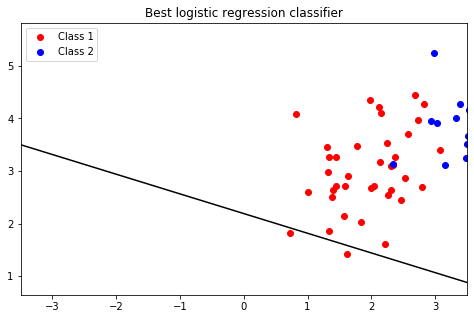

In [3]:
def plot_line(plot_handle, theta):
    X11 = -3.5
    X12 = (- theta[0] - theta[1] * X11) / theta[2]
    X21 = 3.5
    X22 = (- theta[0] - theta[1] * X21) / theta[2]
    plot_handle.plot([X11, X21], [X21, X22], 'k-')

plt.figure(figsize=(8, 5))
plt.plot(X_test[test_idx_0, 1], X_test[test_idx_0, 2], 'ro', label='Class 1')
plt.plot(X_test[test_idx_1, 1], X_test[test_idx_1, 2], 'bo', label='Class 2')
plot_line(plt, theta_best)
plt.xlim([-3.5,3.5])
plt.legend()
plt.title('Best logistic regression classifier')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))

## Question 3 (20 points)

Do the following:
1. Use the SVM code developed in class to fit linear SVMs to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane), and plot validation set accuracy as a function of c.
2. Explain which model is best and why.

In [ ]:
from sklearn.svm import SVC
import numpy as np

X = np.concatenate((X1, X2), 0)
X = np.matrix(X)
print(X.shape)
y = np.concatenate((np.zeros((200,1)), np.ones((200,1))), 0)
model = SVC(kernel='linear', C = 1E343)

In [ ]:
model.fit(X,y)

print(model.support_vectors_)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='winter')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

In [5]:
# import numpy as np
# import cvxopt
# import matplotlib.pyplot as plt

# def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
#     Q = .5 * (Q + Q.T)  # make sure Q is symmetric
#     args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
#     if A is not None:
#         args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
#         if E is not None:
#             args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
#     sol = cvxopt.solvers.qp(*args)
#     if 'optimal' not in sol['status']:
#         return None
#     return np.array(sol['x']).reshape((Q.shape[1],))

# X = np.concatenate((X1, X2), 0)
# X = np.matrix(X)
# type(X)

# y = np.concatenate((-np.ones((200,1)), np.ones((200,1))), 0)

# m = X.shape[0];
# n = X.shape[1];

# # Transform data set so that each attribute has a
# # mean of 0 and a standard deviation of 1

# def preprocess(X):
#     means = X.mean(0);
#     scales = 1/np.std(X,0);
#     Xh = np.concatenate([X.T,np.ones([1,20])],0);
#     Tm = np.matrix(np.eye(3));
#     Tm[0:2,2:3] = -X.mean(0).T;
#     Ts = np.matrix(np.eye(3));
#     Ts[0:2,0:2] = np.diagflat(scales);
#     T = Ts*Tm;
#     XX = (T * Xh);
#     XX = XX[0:2,:].T;
#     return XX, T;

# # RBF/Gaussian kernel

# def gauss_kernel(X):
#     sigma = 0.2
#     m = X.shape[0];
#     K = np.matrix(np.zeros([m,m]));
#     for i in range(0,m):
#         for j in range(0,m):
#             K[i,j] = (X[i,:] - X[j,:]) * (X[i,:] - X[j,:]).T
#     K = np.exp(-K/(2*sigma*sigma))      
#     return K;

# def linear_kernel(X):
#     m = X.shape[0];
#     K = np.matrix(np.zeros([m,m]));
#     for i in range(0,m):
#         for j in range(0,m):
#             K[i,j] = X[i,:]*(X[j,:].T)
#     return K;

# # Linear kernel below. We might also try
# # XX, T = preprocess(X)
# # K = gauss_kernel(XX)
# #print(X)
# K = linear_kernel(X);
# #print(K)
# Q = np.multiply(y * y.T, K)
# print('Q rank: %d' % np.linalg.matrix_rank(Q))
# c = -np.ones([m]);
# A = -np.eye(m);
# b = np.zeros([m]);
# E = y.T;
# d = np.zeros(1);
# alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d);
# print("Optimal alpha:")
# print(alpha_star)

# def get_wb(X, y, alpha):
#     # Find the support vectors
#     S = alpha > 1e-6 #threshold
#     XS = X[S,:]
#     yS = y[S]
#     alphaS = alpha[S]
#     alphaSyS = np.tile(np.multiply(yS.T, alphaS).T, n)
#     w = sum(np.multiply(alphaSyS, XS)).T
#     # Find b
#     KS = K[S,:][:,S]
#     NS = yS.shape[0]
#     b = (np.sum(yS) - np.sum(np.multiply(alphaS,yS.T)*KS))/NS
#     # Normalize w,b
#     scalef = np.linalg.norm(w)
#     w = w / scalef
#     b = b / scalef
#     return w,b

# w,b = get_wb(X, y, alpha_star)

# print("Optimal w: [%f,%f] b: %f" % (w[0],w[1],b))
# plot_mf(Xf,Xm)

# def plot_w(w,b):
#     ylim = plt.axes().get_ylim()
#     xlim = plt.axes().get_xlim()
#     p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
#     p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
#     plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'r-')

# plot_w(w,b)

Q rank: 3
     pcost       dcost       gap    pres   dres
 0: -1.2237e+02 -3.3933e+02  2e+03  4e+01  3e+00
 1: -3.1261e+02 -7.0740e+02  2e+03  3e+01  2e+00
 2: -9.2747e+02 -1.9372e+03  2e+03  3e+01  2e+00
 3: -3.2405e+03 -4.4206e+03  1e+03  2e+01  1e+00
 4: -1.2177e+04 -1.3407e+04  1e+03  2e+01  1e+00
 5: -1.3776e+05 -1.3865e+05  9e+02  1e+01  1e+00
 6: -5.9230e+06 -5.9509e+06  3e+04  1e+01  1e+00
 7: -5.2146e+08 -5.2291e+08  1e+06  1e+01  1e+00
 8: -2.3024e+10 -2.3080e+10  6e+07  1e+01  1e+00
 9: -4.7048e+10 -4.7163e+10  1e+08  1e+01  1e+00
10: -5.5812e+10 -5.5949e+10  1e+08  1e+01  1e+00
11: -5.7758e+10 -5.7899e+10  1e+08  1e+01  1e+00
12: -5.7761e+10 -5.7902e+10  1e+08  1e+01  1e+00
13: -6.3382e+10 -6.3537e+10  2e+08  1e+01  1e+00
14: -6.3428e+10 -6.3584e+10  2e+08  1e+01  1e+00
15: -6.3493e+10 -6.3648e+10  2e+08  1e+01  1e+00
16: -9.7716e+10 -9.7954e+10  2e+08  1e+01  1e+00
17: -2.2949e+11 -2.3004e+11  6e+08  1e+01  1e+00
18: -3.4492e+11 -3.4574e+11  8e+08  1e+01  1e+00
19: -4.7838

TypeError: 'int' object is not subscriptable

## Question 4 (20 points)

Do the following:
1. Use the SVM code developed in class to fit SVMs with the RBF kernel to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane) and gamma (the basis function width), and plot validation set accuracy as a function of c and gamma.
2. Explain which model is best and why.

## Question 5 (20 points)

Using the neural network code you developed (based on the code from class) for the deep learning homework assignment, do the following:
1. Fit a two-layer neural network with ReLU activations in the hidden layer and a logistic output layer to the training data from Question 2. Use several different numbers of hidden units in the hidden layer, and plot validation set accuracy as a function of the number of units in the hidden layer.
2. Explain which neural network is best and why, and briefly compare the neural network to the logistic regression and SVM models developed in the previous questions.

## Question 6 (10 points)

Consider what would happen if you got the data from Question 1 *without labels* and were tasked with using unsupervised learning to model and understand the data set. Based on a quick visualization, you see that there seem to be two main clusters in the data and decide to build a $k$-means ($k$=2) or GMM for the dataset.

Obviously, a GMM would be appropriate, as the data were generated from a mixture of Gaussians in the first place. On the other hand, the $k$-means model would be simpler. Would it be as effective?

Do the following:
1. Write the parameters $\phi_1$, $\phi_2$, $\mathbf{\mu}_1$, $\mathbf{\mu}_2$, $\mathtt{\Sigma}_1$, $\mathtt{\Sigma}_2$ of the "ground truth" model used to generate the data in Question 1.
2. Briefly discuss whether, in practice, the $k$-means model would be worse than, equally good, or better than a GMM for this dataset.